In [1]:
# Импортируем библиотеку pandas

In [1]:
import pandas as pd

In [23]:
# Загружаем данные из файла

In [2]:
df = pd.read_csv("iris.CSV")

In [25]:
# Смотрим первые строчки в файле

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,variety,variety_num
0,5.1,3.5,1.4,0.2,Setosa,0
1,4.9,3.0,1.4,0.2,Setosa,0
2,4.7,3.2,1.3,0.2,Setosa,0
3,4.6,3.1,1.5,0.2,Setosa,0
4,5.0,3.6,1.4,0.2,Setosa,0


In [4]:
# количество строк в датафрейме
len(df)

150

In [5]:
# или так
df.shape

(150, 6)

## Основные сведения о датафрейме

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   variety       150 non-null    object 
 5   variety_num   150 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
# Статистика
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,variety_num
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [8]:
# Список колонок
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'variety',
       'variety_num'],
      dtype='object')

In [9]:
# Значение в колонке
df['sepal_length'].head()

0    5.1
1    4.9
2    4.7
3    4.6
4    5.0
Name: sepal_length, dtype: float64

In [33]:
## Метод value_counts позволяет получить количество строк для каждого значения
## примените его к полю variety

In [10]:
df['variety'].value_counts()

variety
Setosa        50
Versicolor    50
Virginica     50
Name: count, dtype: int64

In [14]:
# Фильтрация наборов колонок
df[['sepal_length', 'sepal_width']].head()

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [15]:
# Сводные таблицы
df[['variety', 'sepal_width']].groupby(['variety']).mean().sort_values(by='sepal_width', ascending=False)

,sepal_width
variety,
Setosa,3.428
Virginica,2.974
Versicolor,2.770


In [19]:
## Посчитайте аналогичные показатели для колонки sepal_length
df[['variety', 'sepal_length']].groupby('variety').mean().sort_values(by='sepal_length', ascending=False)


,sepal_length
variety,
Virginica,6.588
Versicolor,5.936
Setosa,5.006


## Отображение данных

In [20]:
import matplotlib.pyplot as plt

(array([ 9., 23., 14., 27., 16., 26., 18.,  6.,  5.,  6.]),
 array([4.3 , 4.66, 5.02, 5.38, 5.74, 6.1 , 6.46, 6.82, 7.18, 7.54, 7.9 ]),
 <BarContainer object of 10 artists>)

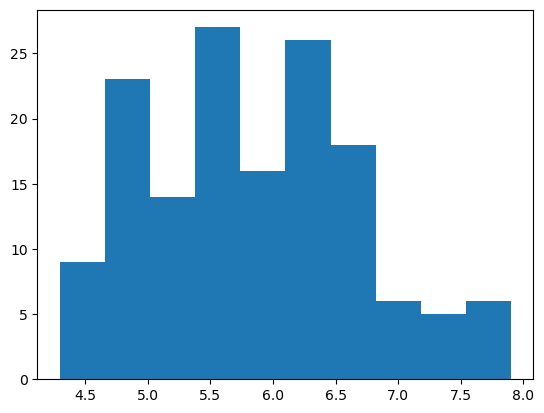

In [21]:
plt.hist(df['sepal_length'])

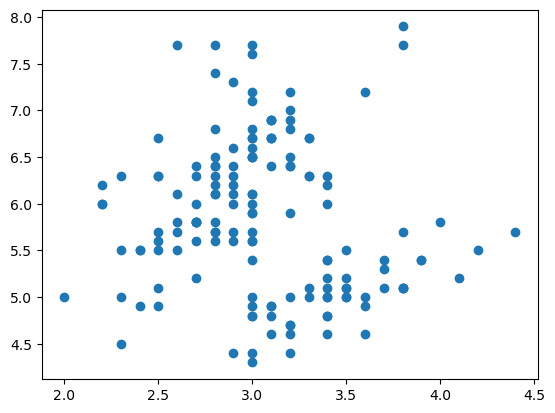

In [22]:
## Более сложные визуализации
plt.scatter(
    df['sepal_width'],
    df['sepal_length']
)

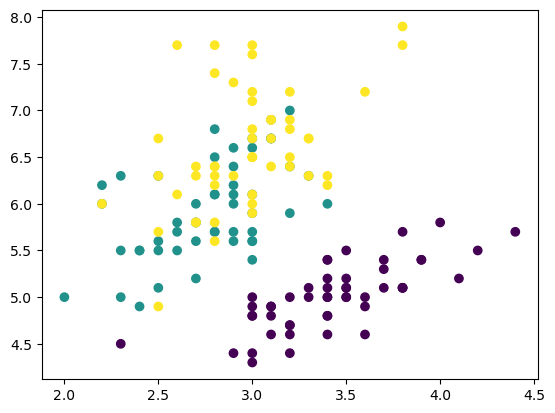

In [23]:
## Более сложные визуализации с цветом
plt.scatter(
    df['sepal_width'],
    df['sepal_length'],
    c=df['variety_num']
)

In [44]:
## Постройте аналогичный график с цветами для параметров petal_width, petal_length

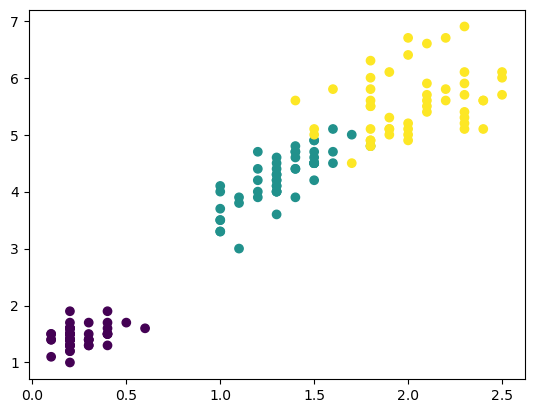

In [24]:
plt.scatter(
    df['petal_width'],
    df['petal_length'],
    c=df['variety_num']
)

## Машинное обучение

In [25]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'variety',
       'variety_num'],
      dtype='object')

In [26]:
X, y = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']], df['variety_num']

In [32]:
# Функции для разделения данных на данные для обучения и тестирования
from sklearn.model_selection import train_test_split

In [62]:
# Разделяем данные на данные для обучения и тестирования
# test_size - количество данных для проверки (обычно от 10% до 20%)
# X_train - набор признаков для обучения
# y_train - связанные с X_train метки для обучения
# X_test - набор признаков проверочных объектов
# y_test - связанные с X_test метки проверочных объектов
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [55]:
# Данные делятся случайным образом
X_train.head()

,sepal_length,sepal_width,petal_length,petal_width
36,5.5,3.5,1.3,0.2
108,6.7,2.5,5.8,1.8
54,6.5,2.8,4.6,1.5
69,5.6,2.5,3.9,1.1
113,5.7,2.5,5.0,2.0


In [41]:
# Импортируем модуль логистической регрессии (алгоритм классификации)
# а линейная регрессия - алгоритм регрессии
from sklearn.linear_model import LogisticRegression

In [63]:
model = LogisticRegression()
type(model)

sklearn.linear_model._logistic.LogisticRegression

In [64]:
model.fit(X_train, y_train)

LogisticRegression()

In [65]:
# Оцениваем качество
from sklearn.metrics import accuracy_score

In [66]:
# Оцениваем качество на выборке для обучения
accuracy_score(y_train, model.predict(X_train))

0.975

In [68]:
# Оцениваем качество на выборке для тестирования
accuracy_score(y_test, model.predict(X_test))

1.0

In [ ]:
# Возьмите модель DecisionTreeClassifier из sklearn.tree
# Обучите модель на тех же данных и оцените качество

In [69]:
from sklearn.tree import DecisionTreeClassifier

In [70]:
model_tree = DecisionTreeClassifier()

In [74]:
model_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [78]:
print(accuracy_score(y_train, model_tree.predict(X_train)),\
      accuracy_score(y_test, model_tree.predict(X_test)))

1.0 0.9666666666666667
